# Prism Data

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
consdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-consDF.pqt')
consdf.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET
0,0,2021-09-01,726.0,0.0
1,1,2021-07-01,626.0,0.0
2,2,2021-05-01,680.0,0.0
3,3,2021-03-01,734.0,0.0
4,4,2021-10-01,676.0,0.0


In [3]:
acctdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-acctDF.pqt')
acctdf

,prism_consumer_id,prism_account_id,account_type,balance_date,balance
0,3023,0,SAVINGS,2021-08-31,90.57
1,3023,1,CHECKING,2021-08-31,225.95
2,4416,2,SAVINGS,2022-03-31,15157.17
3,4416,3,CHECKING,2022-03-31,66.42
4,4227,4,CHECKING,2021-07-31,7042.90
...,...,...,...,...,...
24461,11500,24461,CHECKING,2022-03-27,732.75
24462,11615,24462,SAVINGS,2022-03-30,5.00
24463,11615,24463,CHECKING,2022-03-30,1956.46
24464,12210,24464,CHECKING,2022-03-28,2701.51


In [4]:
trxndf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-trxnDF.pqt')
trxndf

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,3023,0,4,0.05,CREDIT,2021-04-16
1,3023,1,12,481.56,CREDIT,2021-04-30
2,3023,2,4,0.05,CREDIT,2021-05-16
3,3023,3,4,0.07,CREDIT,2021-06-16
4,3023,4,4,0.06,CREDIT,2021-07-16
...,...,...,...,...,...,...
6407316,10533,6405304,31,4.96,DEBIT,2022-03-11
6407317,10533,6405305,12,63.48,DEBIT,2022-03-30
6407318,10533,6405306,12,53.99,DEBIT,2022-03-30
6407319,10533,6405307,12,175.98,DEBIT,2022-03-31


In [5]:
acct_agg = acctdf.groupby(['prism_consumer_id', 'balance_date']).agg(
        total_balance=('balance', 'sum'),
        num_accounts=('balance', 'count')
    ).reset_index()
acct_agg

df = pd.merge(consdf, acct_agg, on=['prism_consumer_id'], how='left')
df


,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance_date,total_balance,num_accounts
0,0,2021-09-01,726.0,0.0,2021-08-31,320.37,2.0
1,1,2021-07-01,626.0,0.0,2021-06-30,3302.42,2.0
2,2,2021-05-01,680.0,0.0,2021-04-30,2805.36,2.0
3,3,2021-03-01,734.0,0.0,2021-02-28,7667.01,2.0
4,4,2021-10-01,676.0,0.0,2020-12-31,2.93,1.0
...,...,...,...,...,...,...,...
15325,14995,2022-03-08,655.0,NaN,NaN,NaN,NaN
15326,14996,2022-01-15,625.0,NaN,2022-01-15,6821.92,2.0
15327,14997,2022-01-31,688.0,NaN,NaN,NaN,NaN
15328,14998,2022-03-08,722.0,NaN,NaN,NaN,NaN


In [6]:
goods = df[df['DQ_TARGET']==0]
goods.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance_date,total_balance,num_accounts
0,0,2021-09-01,726.0,0.0,2021-08-31,320.37,2.0
1,1,2021-07-01,626.0,0.0,2021-06-30,3302.42,2.0
2,2,2021-05-01,680.0,0.0,2021-04-30,2805.36,2.0
3,3,2021-03-01,734.0,0.0,2021-02-28,7667.01,2.0
4,4,2021-10-01,676.0,0.0,2020-12-31,2.93,1.0


In [7]:
goods.shape

(11259, 7)

In [8]:
# for confidence level of 95% and margin of error 5%, use sample size of at least 279
sampled_goods = goods.sample(n=400, random_state=42)
sampled_goods

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance_date,total_balance,num_accounts
8656,8326,2023-04-07,652.0,0.0,2023-04-07,1597.16,2.0
1708,1596,2021-02-01,780.0,0.0,2021-01-31,1557.67,2.0
12451,12121,2021-12-06,771.0,0.0,2021-12-06,19280.56,2.0
3364,3148,2021-10-01,689.0,0.0,2021-10-01,6040.42,2.0
3043,2856,2021-10-01,738.0,0.0,2021-09-30,2668.06,2.0
...,...,...,...,...,...,...,...
6198,5868,2023-09-09,781.0,0.0,2023-09-09,11375.89,5.0
1710,1598,2022-01-01,758.0,0.0,2021-12-31,31774.03,2.0
3988,3730,2021-04-01,675.0,0.0,2021-04-01,-232.92,1.0
8840,8510,2023-09-29,638.0,0.0,2023-09-29,1115.77,2.0


In [9]:
daily_avg = sampled_goods.groupby('balance_date')['total_balance'].mean().reset_index()
px.line(daily_avg, x='balance_date', y='total_balance')

In [10]:
# add median plot
daily_avg = sampled_goods.groupby('balance_date').agg({
    'total_balance': ['mean', 'median']
}).reset_index()
daily_avg.columns = ['balance_date', 'mean_balance', 'median_balance']

fig = px.line(daily_avg, x='balance_date', y=['mean_balance', 'median_balance'],
              title='Average vs Median Total Balance Over Time')
fig.update_layout(yaxis_title='Total Balance ($)', 
                  legend_title_text='Metric')
fig.show()

In [11]:
lower = sampled_goods['total_balance'].quantile(0.05)
upper = sampled_goods['total_balance'].quantile(0.95)

sampled_goods_viz = sampled_goods[
    sampled_goods['total_balance'].between(lower, upper)
]

In [12]:
daily_avg_smaller = sampled_goods_viz.groupby('balance_date').agg({
    'total_balance': ['mean', 'median']
}).reset_index()
daily_avg_smaller.columns = ['balance_date', 'mean_balance', 'median_balance']

fig = px.line(daily_avg_smaller, x='balance_date', y=['mean_balance', 'median_balance'],
              title='Average vs Median Total Balance Over Time')
fig.update_layout(yaxis_title='Total Balance ($)', 
                  legend_title_text='Metric')
fig.show()

In [13]:
bads = df[df['DQ_TARGET']==1]
bads.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance_date,total_balance,num_accounts
51,46,2021-08-01,514.0,1.0,2021-07-31,130.53,2.0
67,62,2021-01-01,680.0,1.0,2020-12-31,248.64,2.0
84,78,2021-08-01,737.0,1.0,2021-07-31,40082.65,2.0
166,154,2021-08-01,706.0,1.0,2021-07-31,1283.67,2.0
213,196,2021-09-01,573.0,1.0,2021-08-27,18.86,1.0


In [14]:
bads.shape

(1012, 7)

In [15]:
# for confidence level of 95% and margin of error 5%, use sample size of at least 279
sampled_bads = bads.sample(n=300, random_state=42)
sampled_bads

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance_date,total_balance,num_accounts
8442,8112,2023-05-08,512.0,1.0,2023-05-08,200.00,1.0
8462,8132,2023-01-02,551.0,1.0,2023-01-02,0.04,1.0
13581,13251,2022-01-23,653.0,1.0,2022-01-23,1981.61,1.0
8424,8094,2023-06-21,546.0,1.0,2023-06-21,17.15,1.0
6816,6486,2023-09-19,591.0,1.0,2023-09-19,45.06,1.0
...,...,...,...,...,...,...,...
6718,6388,2023-08-14,638.0,1.0,2023-08-14,314.17,1.0
10863,10533,2022-03-31,789.0,1.0,NaN,NaN,NaN
12965,12635,2022-03-29,657.0,1.0,NaN,NaN,NaN
7207,6877,2023-03-25,588.0,1.0,2023-03-25,10.00,1.0


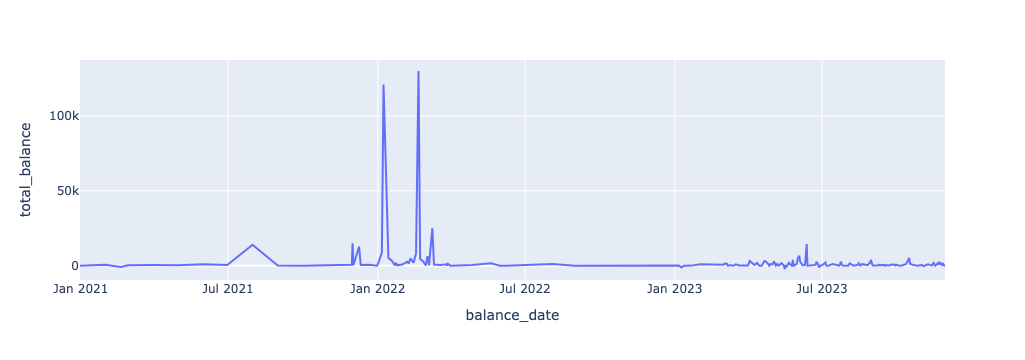

In [16]:
daily_avg_bads = sampled_bads.groupby('balance_date')['total_balance'].mean().reset_index()
px.line(daily_avg_bads, x='balance_date', y='total_balance')

In [17]:
# add median plot
daily_avg_bads = sampled_bads.groupby('balance_date').agg({
    'total_balance': ['mean', 'median']
}).reset_index()
daily_avg_bads.columns = ['balance_date', 'mean_balance', 'median_balance']

fig = px.line(daily_avg_bads, x='balance_date', y=['mean_balance', 'median_balance'],
              title='Average vs Median Total Balance Over Time')
fig.update_layout(yaxis_title='Total Balance ($)', 
                  legend_title_text='Metric')
fig.show()

In [18]:
lower_bads = sampled_bads['total_balance'].quantile(0.05)
upper_bads = sampled_bads['total_balance'].quantile(0.95)

sampled_bads_viz = sampled_bads[
    sampled_bads['total_balance'].between(lower_bads, upper_bads)
]

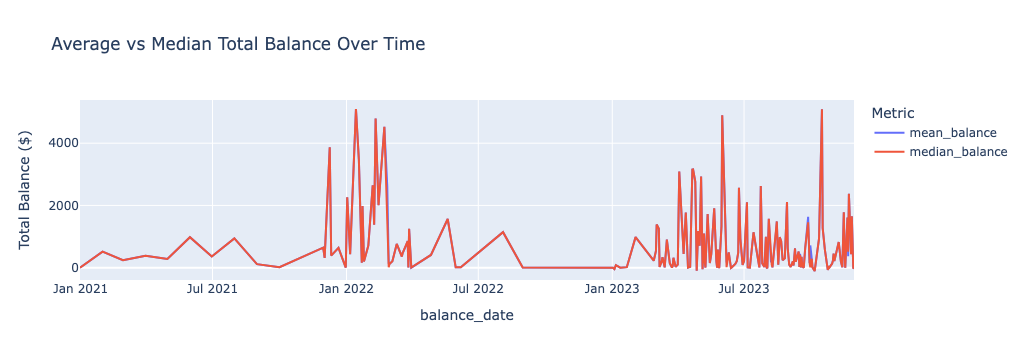

In [19]:
daily_avg_smaller_bads = sampled_bads_viz.groupby('balance_date').agg({
    'total_balance': ['mean', 'median']
}).reset_index()
daily_avg_smaller_bads.columns = ['balance_date', 'mean_balance', 'median_balance']

fig2 = px.line(daily_avg_smaller_bads, x='balance_date', y=['mean_balance', 'median_balance'],
              title='Average vs Median Total Balance Over Time')
fig2.update_layout(yaxis_title='Total Balance ($)', 
                  legend_title_text='Metric')
fig2.show()
# bads graph --> more variability

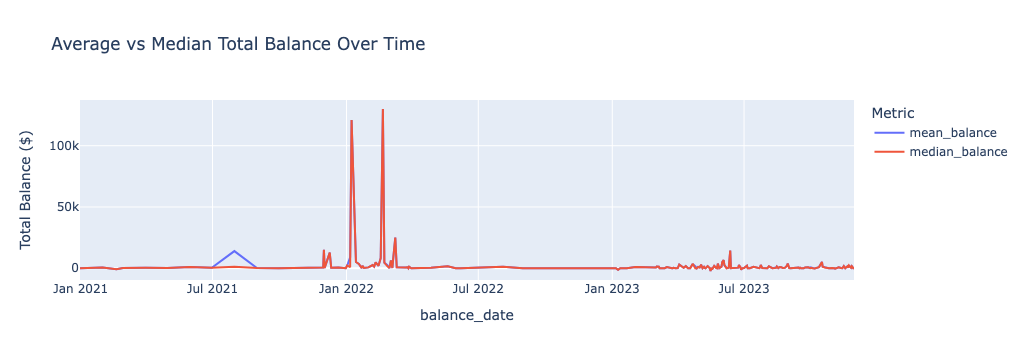

In [20]:
fig.show()
# goods graph --> less variability

In [21]:
print("Goods variability:", sampled_goods['total_balance'].std())
print("Bads variability:", sampled_bads['total_balance'].std())

# Also check: are bads' balances stuck at certain values?
print("\nBads unique balance values:", sampled_bads['total_balance'].nunique())
print("Goods unique balance values:", sampled_goods['total_balance'].nunique())

Goods variability: 19027.31010725502
Bads variability: 11299.357492475392

Bads unique balance values: 270
Goods unique balance values: 350
